In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
dane = pd.read_excel('dane.xlsx')

In [4]:
data = pd.to_datetime(dane[['year','month','day']])

In [5]:
dane['data']=data

In [6]:
dane_gotowe_all = dane[['data','company','net','country','opiekun']]

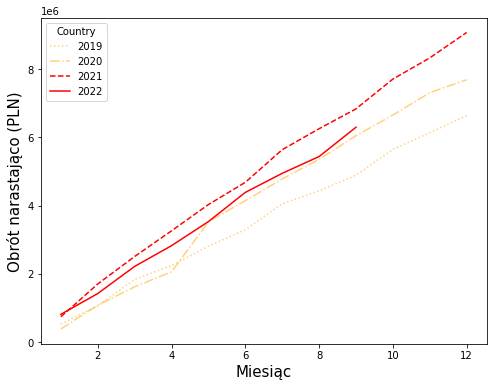

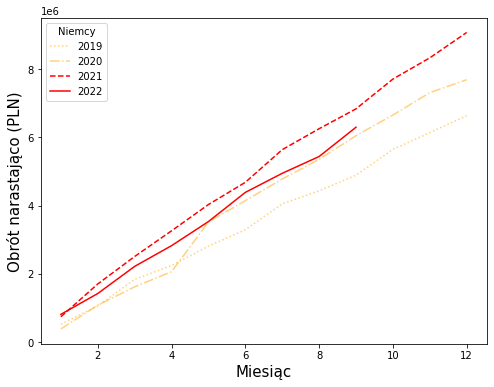

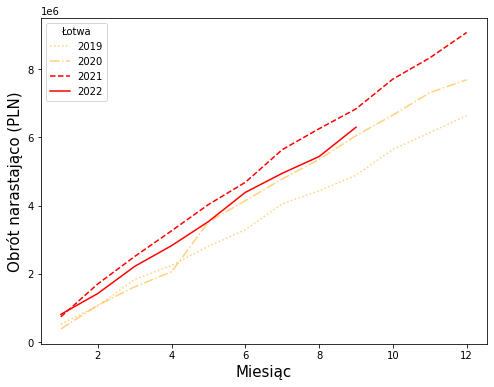

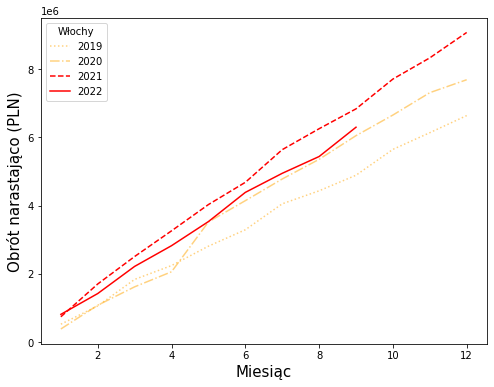

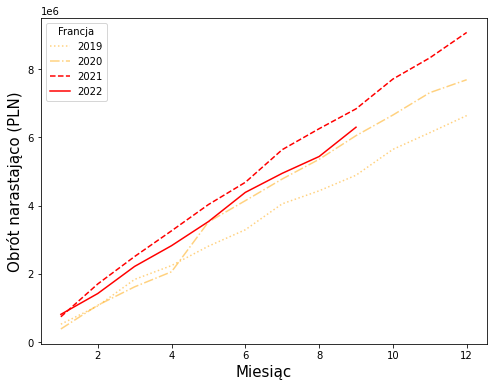

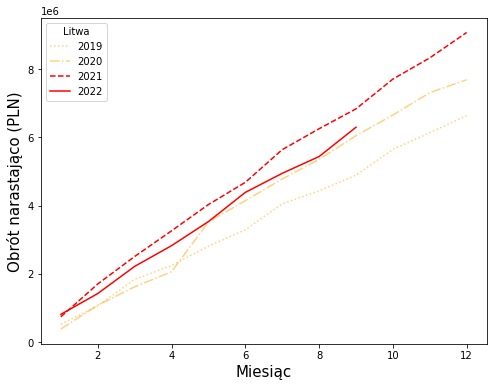

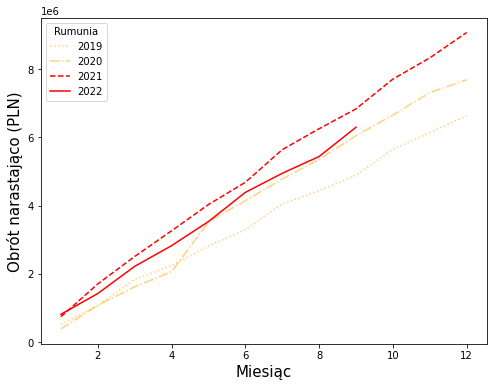

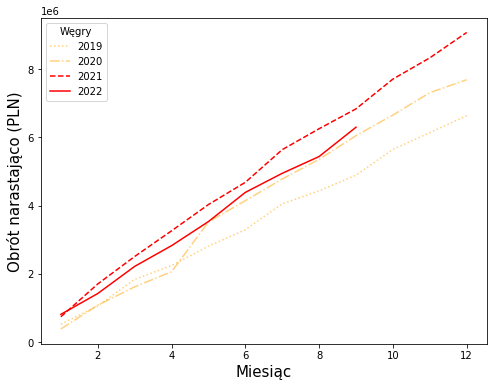

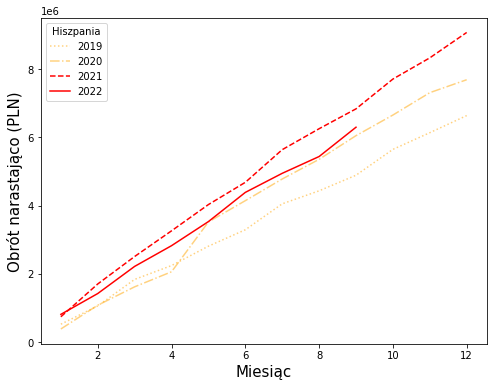

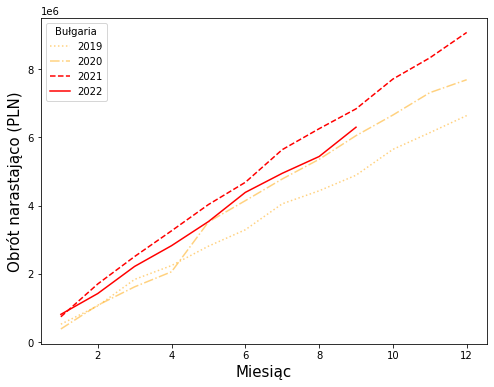

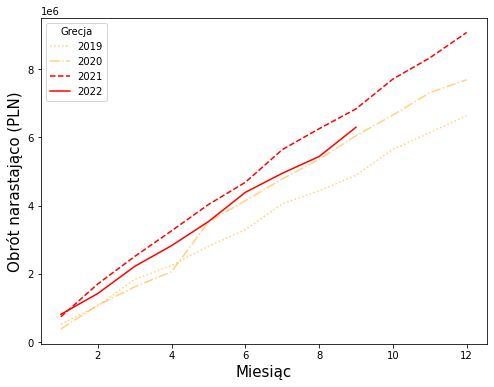

In [23]:
countries = ['Country','Niemcy', 'Łotwa', 'Włochy', 'Francja', 'Litwa', 'Rumunia', 'Węgry', 'Hiszpania', 'Bułgaria', 'Grecja']

for country in countries:
    dane_gotowe = dane_gotowe_all
    
    Country2021= dane_gotowe[(dane_gotowe['data']> '2021-01-01') & (dane_gotowe['data']<= '2021-12-31')]
    Country2021= Country2021.groupby(pd.Grouper(key='data',axis = 0, freq= 'M')).sum()
    Country2021 = Country2021.cumsum()
    Country2021['no'] = [a for a in range(1,len(Country2021)+1)]
    Country2021=Country2021.set_index('no')

    Country2020= dane_gotowe[(dane_gotowe['data']> '2020-01-01') & (dane_gotowe['data']<= '2020-12-31')]
    Country2020= Country2020.groupby(pd.Grouper(key='data',axis = 0, freq= 'M')).sum()
    Country2020 = Country2020.cumsum()
    Country2020['no'] = [a for a in range(1,len(Country2020)+1)]
    Country2020=Country2020.set_index('no')

    Country2022= dane_gotowe[(dane_gotowe['data']> '2022-01-01') & (dane_gotowe['data']<= '2022-12-31')]
    Country2022= Country2022.groupby(pd.Grouper(key='data',axis = 0, freq= 'M')).sum()
    Country2022 = Country2022.cumsum()
    Country2022['no'] = [a for a in range(1,len(Country2022)+1)]
    Country2022=Country2022.set_index('no')

    Country2019= dane_gotowe[(dane_gotowe['data']> '2019-01-01') & (dane_gotowe['data']<= '2019-12-31')]
    Country2019= Country2019.groupby(pd.Grouper(key='data',axis = 0, freq= 'M')).sum()
    Country2019 = Country2019.cumsum()
    Country2019['no'] = [a for a in range(1,len(Country2019)+1)]
    Country2019=Country2019.set_index('no')

    ax = plt.figure(figsize=(8,6)).add_subplot(1,1,1)
    ax.plot(Country2019, ':',color= 'orange', alpha = 0.5)
    ax.plot(Country2020,'-.', color= 'orange', alpha = 0.5)
    ax.plot(Country2021, '--', color = 'red')
    ax.plot(Country2022, color = 'red')
    ax.set_xlabel('Miesiąc', size = 15)
    ax.set_ylabel("Obrót narastająco (PLN)", size = 15)
    ax.legend(['2019','2020','2021','2022'], title = country)
    plt.savefig(country+'.jpg', dpi = 100)

In [9]:
years =[2014,2015,2016,2017,2018,2019,2020,2021,2022]
dict_by_years ={}

for a in years:
    dane = dane_gotowe_all[(dane_gotowe_all['data']>str(a)) & (dane_gotowe_all['data']<str(a+1))]
    dane = dane.groupby(['country']).sum()
    dane['no'] = [a for a in range(len(dane))]
    dict_by_years[a] = dane
    
dane_merged = 0
for enum,a in enumerate(dict_by_years.keys()):
    if enum == 0:
        dane_merged =dict_by_years[a] 
    else:
        dane_merged = dane_merged.merge(dict_by_years[a], on = 'country', suffixes =(None,a))
    

In [10]:
dane_merged_do_wykresu= dane_merged[['net','net2015','net2016','net2017','net2018','net2019','net2020','net2021','net2022']].sort_values(by='net2021',ascending = False)


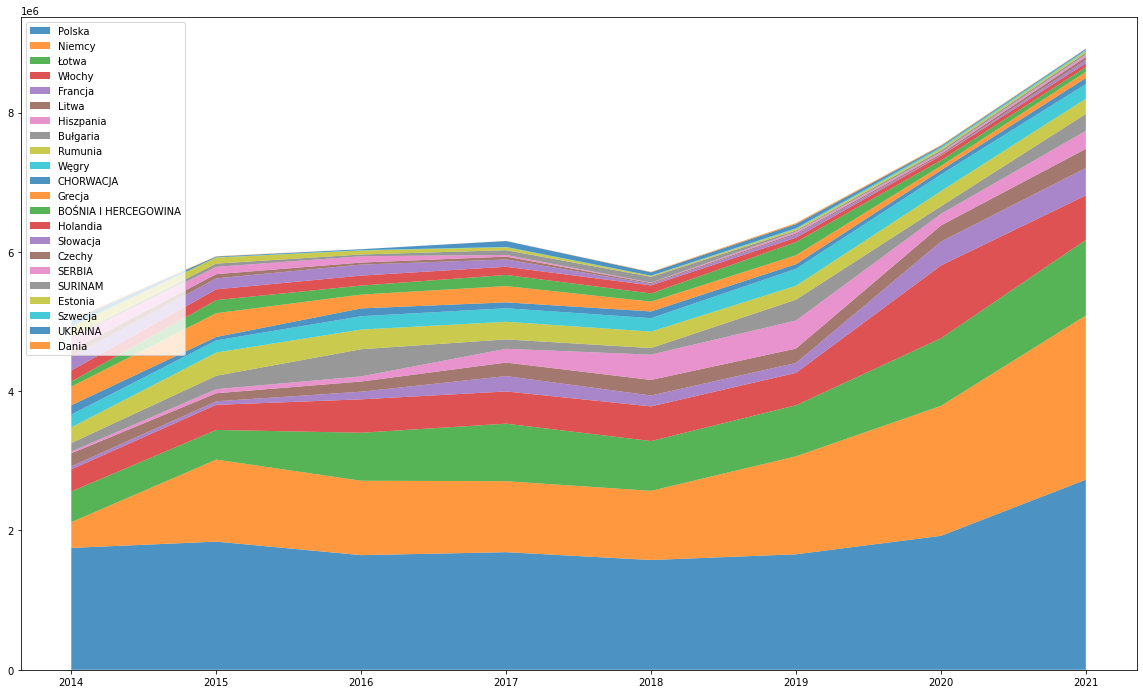

In [11]:
dane_merged_do_wykresu= dane_merged[['net','net2015','net2016','net2017','net2018','net2019','net2020','net2021']].sort_values(by='net2021',ascending = False)
years =[2014,2015,2016,2017,2018,2019,2020,2021]
#fig, ax = plt.subplots()
ax = plt.figure(figsize=(20,12)).add_subplot(1,1,1)
ax.stackplot(years, dane_merged_do_wykresu, labels=dane_merged_do_wykresu.index, alpha=0.8)
ax.legend(dane_merged_do_wykresu.index, loc='upper left')
plt.savefig('Countries_by_years.jpg', dpi = 400)

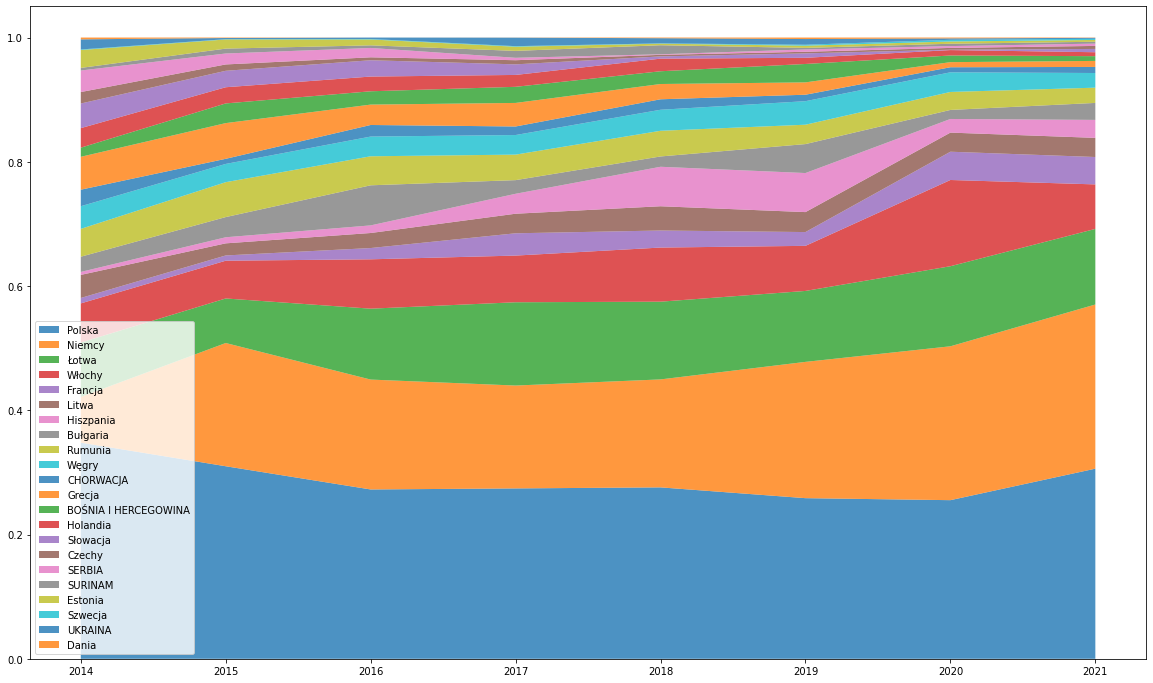

In [14]:
dane_merged_do_wykresu= dane_merged[['net','net2015','net2016','net2017','net2018','net2019','net2020','net2021']].sort_values(by='net2021',ascending = False)
years =[2014,2015,2016,2017,2018,2019,2020,2021]
#fig, ax = plt.subplots()
ax = plt.figure(figsize=(20,12)).add_subplot(1,1,1)
ax.stackplot(years, dane_procentowo/dane_procentowo.sum(), labels=dane_merged_do_wykresu.index, alpha=0.8)
ax.legend(dane_merged_do_wykresu.index, loc='lower left')
plt.savefig('Countries_by_years.jpg', dpi = 400)